# Abstract:

#### Background:

In March 2020, the World Health Organization (WHO) declared COVID-19 a pandemic, caused by the novel SARS-CoV-2 virus. Following the call from the WHO to immediately assess available data to learn what care approaches are most effective and evaluate the effects of therapies, this collection aims to report on original peer-reviewed research articles in methodological approaches to medical research related to COVID-19. As stated in NEXOID's official webpage, this data has been accumulated from their web-based self-reported survey since 25th of March 2020.

#### Method:

Extracted from the raw available data from NEXOID-UK of global respondents reporting their COVID-19 status along with other medical conditions. Such comorbidities as asthma, liver disease, lung disease, diabetes, kidney disease and hypertension will be discussed with other daily living aspects to provide the clear understanding of what elements cause the rash of the epidemic. This paper will introduce an informative outlook of the viral disease by applying Exploratory Data Analysis, in addition to optimizing logistic regression and association rules on given risk facts as independent univeriate and multivariate variables  

#### Result

#### Conclusion

In [2]:
pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-cp37-none-any.whl size=11435 sha256=c127eedb2861e265523227b8e98a25bbb131f5e27c4d5d7d1063c4e84e99ab34
  Stored in directory: C:\Users\n10648771\AppData\Local\pip\Cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy import stats 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly as py
py.offline.init_notebook_mode(connected=True)
import folium

In [5]:
df=pd.read_csv(r'Documents/D1.csv')

### TASK 1

Examine data variables:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5111 entries, 0 to 5110
Data columns (total 39 columns):
survey_date               5111 non-null object
region                    1485 non-null object
country                   5109 non-null object
ip_latitude               5111 non-null float64
ip_longitude              5111 non-null float64
ip_accuracy               5111 non-null int64
sex                       5111 non-null object
age                       5111 non-null object
height                    5111 non-null int64
weight                    5111 non-null int64
bmi                       5111 non-null float64
blood_type                5111 non-null object
insurance                 3943 non-null object
income                    3943 non-null object
race                      3943 non-null object
immigrant                 3943 non-null object
smoking                   5072 non-null object
contacts_count            5065 non-null float64
house_count               5111 non-null int64


By comparing to the dataset description provided, such variables are considered for datatype correction: Survey_date, Contacts_count, Public_transport_count,Worried.
To be more specific:
- 'survey_date' as described in the assessment specification: it is a collection of dates recording data from the website, therefore, the most suitable datatype for this variable is Datetime. 
- 'contacts_count','public_transport_count','worried' should be converted to integer datatype due to these factors indicates the number of people and the level of individual concern about the pandemic. Hence, based on conventional logics, it should not be in 'float' type. 

In [7]:
#Convert 'survey_date' datatype:
#Alternatively, we can impute the type for this column when importing the csv by using: df=pd.read_csv(r'Downloads/D1.csv',parse_dates=['survey_date'])
df['survey_date']=pd.to_datetime(df['survey_date'])

In [8]:
#Accordingly, we use proper function to convert other variables into integers (astype): 
df['contacts_count']=df.contacts_count.astype('Int64')
df['public_transport_count']=df.public_transport_count.astype('Int64')
df['worried']=df.worried.astype('Int64')

#### After conversion, we gonna check it again to ensure our correct datatype has been placed:
#### Note that 'Int64' is a nullable datatype for integers

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5111 entries, 0 to 5110
Data columns (total 39 columns):
survey_date               5111 non-null datetime64[ns]
region                    1485 non-null object
country                   5109 non-null object
ip_latitude               5111 non-null float64
ip_longitude              5111 non-null float64
ip_accuracy               5111 non-null int64
sex                       5111 non-null object
age                       5111 non-null object
height                    5111 non-null int64
weight                    5111 non-null int64
bmi                       5111 non-null float64
blood_type                5111 non-null object
insurance                 3943 non-null object
income                    3943 non-null object
race                      3943 non-null object
immigrant                 3943 non-null object
smoking                   5072 non-null object
contacts_count            5065 non-null Int64
house_count               5111 non-null 

### TASK 2

###### 1. Identify and report the skewness present in the variables:

In [10]:
#Import skew package for measuring skewness distribution of our variables
from scipy.stats import skew
import pylab as p 

In [11]:
df.skew()

ip_latitude               -2.087471
ip_longitude               1.652506
ip_accuracy                3.157092
height                    -0.444816
weight                     1.203467
bmi                        2.205616
contacts_count             1.001026
house_count                1.777352
public_transport_count     6.091561
worried                   -0.301183
covid19_positive           0.557063
covid19_symptoms           2.354682
covid19_contact            2.369179
asthma                     2.284441
kidney_disease             7.964242
liver_disease             10.175924
compromised_immune         3.605102
heart_disease              4.768362
lung_disease               6.159167
diabetes                   2.988074
hiv_positive              15.508909
hypertension               1.652573
other_chronic              3.341092
nursing_home              10.401023
health_worker              3.653815
risk_infection             0.406947
risk_mortality            13.180574
dtype: float64

The values for asymmetry and kurtosis between -2 and +2 are considered acceptable in order to prove normal univariate distribution (George & Mallery, 2010). George, D., & Mallery, M. (2010). SPSS for Windows Step by Step: A Simple Guide and Reference, 17.0 update (10a ed.) Boston: Pearson. As a general rule of thumb:

- If skewness is less than -2 or greater than 2, the distribution is highly skewed.
- If skewness is between -2 and -1 or between 1 and 2, the distribution is moderately skewed.
- If skewness is between -1 and 1, the distribution is approximately symmetric.

Our paper will only visualize the highly skewed distribution variables to have the general view of dataset: 


In [12]:
df_highskewness=df[df.skew()[df.skew()>2].index]

In [13]:
df_highskewness

,ip_accuracy,bmi,public_transport_count,covid19_symptoms,covid19_contact,asthma,kidney_disease,liver_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,other_chronic,nursing_home,health_worker,risk_mortality
0,500,23.6,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0.194
1,5,31.2,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,3.483
2,10,22.1,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0.050
3,20,71.1,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,13.973
4,5,34.8,NaN,1,1,1,0,0,0,0,0,1,0,1,0,0,0.116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5106,5,23.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.496
5107,1,24.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.510
5108,1,24.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.171
5109,5,23.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.557


##### 2. Identify data errors and explain and use suitable visualisation plots

Data errors include outliers, null values, discrepancies, noises. For each data issues, we need to compute different techniques to correctly identify the problems in order to provide effective solutions for future model building
- As we can see from the below table, the dataset has a significant problems of missing values. 

In [14]:
df.isnull().sum()

survey_date                  0
region                    3626
country                      2
ip_latitude                  0
ip_longitude                 0
ip_accuracy                  0
sex                          0
age                          0
height                       0
weight                       0
bmi                          0
blood_type                   0
insurance                 1168
income                    1168
race                      1168
immigrant                 1168
smoking                     39
contacts_count              46
house_count                  0
public_transport_count    1168
working                     46
worried                   1168
covid19_positive             0
covid19_symptoms             0
covid19_contact              0
asthma                       0
kidney_disease               0
liver_disease                0
compromised_immune           0
heart_disease                0
lung_disease                 0
diabetes                     0
hiv_posi

Now we will plot missing data to understand the patterns

In [15]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


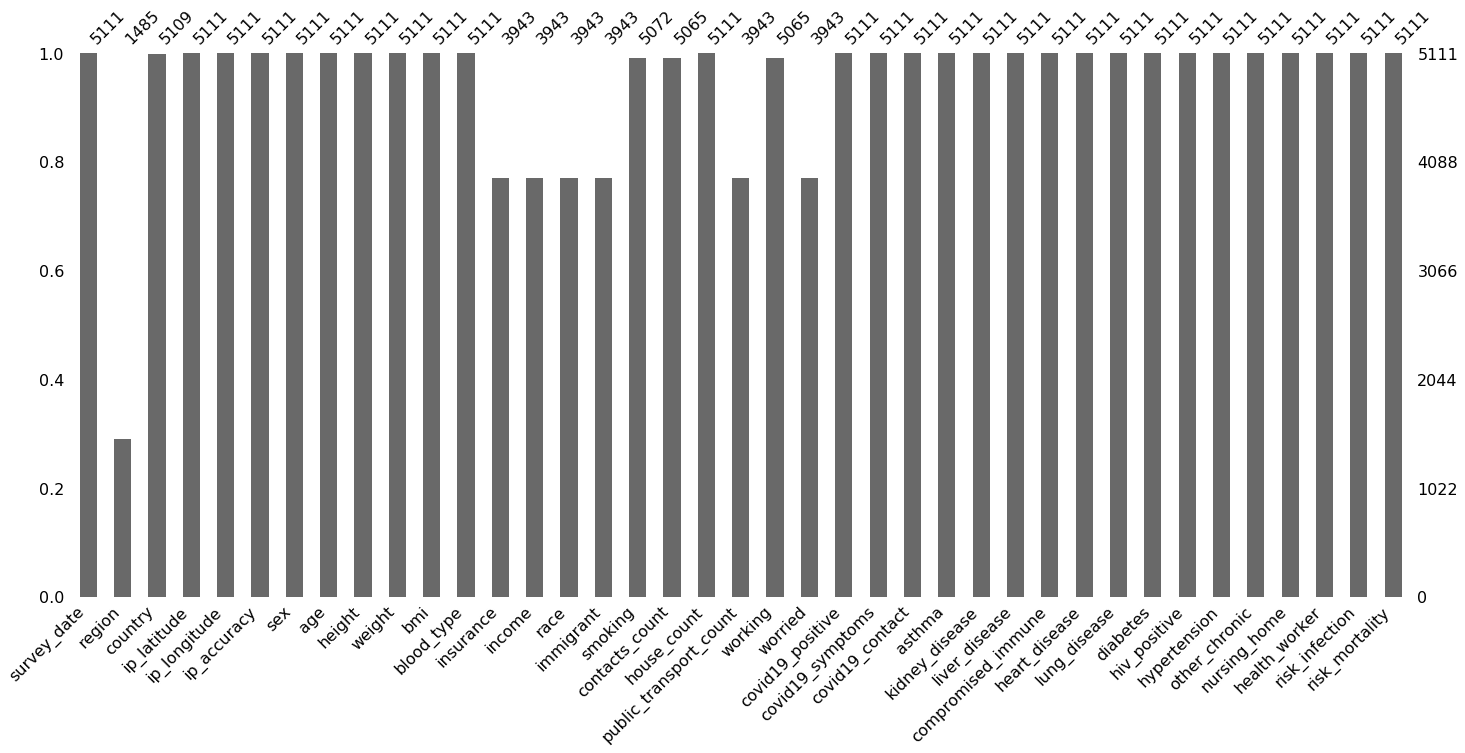

In [16]:
import missingno as msno
msno.bar(df)

From the computed barchart, we can see that 'Region' has the least filled values with only 1485 while other missing-data columns share the common figure of 3943 replies. 'Country' also is incompletely surveyed with 2 entries left empty. 

However, after examining the given CSV, we detected that 'region' column is misintepreted by the computer's algorigthm since the NA values (North American) is mistaken for Null values. To clearify our assumption, we use 'unique' function:

In [17]:
df['region'].unique()

array([nan, 'EU', 'SA', 'OC', 'AS', 'AF'], dtype=object)

As you can see, the output for Region's unique values did not include North America, we need re-fill the values. But be careful, from the NEXOID's Covid19 Calculator, we can only input countries after we input our REGION values. Therefore, number of filled entries of Region column MUST be equal OR higher  that of Country column (5109 to 5111 entries).

First we need to detect how many actual missing values of REGION based on COUNTRY column:  

In [18]:
#Provide Codes here: 
df.loc[df.country.isnull()]

,survey_date,region,country,ip_latitude,ip_longitude,ip_accuracy,sex,age,height,weight,...,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,nursing_home,health_worker,risk_infection,risk_mortality
1529,2020-03-25,NaN,NaN,51.5875,-0.1807,50,male,50_60,172,96,...,1,0,1,0,1,0,0,0,100.0,0.500
2261,2020-03-07,AF,NaN,-22.5178,17.0481,1000,male,30_40,166,64,...,0,0,0,0,0,0,0,0,13.0,0.079


We can see that only 1 entry of REGION had not been filled in the original dataset (entry no 1529). The 1 missing point is too marginal to affect the general data points, therefore, we will fill it with string NA: 

In [19]:
df['region'].fillna('NA', inplace=True)


We now double check it with table below: 

In [20]:
#ode

We attempted to detect data inconsistency by doing 2 things: 
    - We try to use histogram and countplot (using df.hist() and sns.countplot()) for these variables to identify if there are any inappropriate values in the data columns. And we found that all entries are properly filled
    - We initially suspect that the BMI values might not consistently be calculated from the Height and the Weight. But ultimately, it is correctly imputed. 
##### Therefore our conclusion is that the dataset is perfectly consistent yet.

The final data issue that our team was aware of is "noise" or 'outlier'. The approach to this process is simple, we will define our own function based on mean and standard deviation of data to identify the outliers on the continuous variables. 

In [21]:
#Define
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return len(outliers)

For example, the number of outliers in Height column can be detected as following: 

In [22]:
height_out=detect_outlier(df['height'])
print(height_out)


45


The function above displayed that there are 135 outliers among 5111 entries. Likewise, we will input other numeric columns with this function and we will have the following: 

In [23]:
outliers.clear()
a=detect_outlier(df['weight'])
print(df.weight.name+":" +str(a))
outliers.clear()
b=detect_outlier(df['house_count'].dropna())
print(df.house_count.name+":" +str(b))
outliers.clear()
c=detect_outlier(df['contacts_count'].dropna())
print(df.contacts_count.name+":" +str(c))
outliers.clear()
d=detect_outlier(df['public_transport_count'].dropna())
print(df['public_transport_count'].name +":" +str(d))
outliers.clear()
e=detect_outlier(df['risk_infection'].dropna())
print(df['risk_infection'].name +":" +str(e))
outliers.clear()
f=detect_outlier(df['risk_mortality'].dropna())
print(df['risk_mortality'].name +":" +str(f))

weight:76
house_count:79
contacts_count:0
public_transport_count:84
risk_infection:0
risk_mortality:53


In [24]:
#Complile a table for this bro:

##### 3a: What is the BMI patient from the US who is COVID-19 positive

In order to get the value of US's patients, we need to group by the values of country and bmi where countries equals US and we also need to make sure that the value of covid19_positive is 1 because we are looking for the infected people.

In [25]:
df[df['covid19_positive']==1].groupby('country')['bmi'].mean()['US']

30.89091653027822

###### 3b: Which country has the highest (average) risk of mortality: 

The risk of mortality rate in all countries are calculated by indexing individual nations and compute the mean of each subset. To identify the nation with highest risk, our team will rank the output in the descending order:

In [26]:
df.groupby('country')['risk_mortality'].mean().sort_values().tail(5)


country
NZ     3.143556
AM     3.291000
PT     3.603583
AD     3.994000
IT    10.031844
Name: risk_mortality, dtype: float64

As we can see from the table, Italia has the most extreme risk of fatality with 10.03

In [27]:
fig1=px.density_mapbox(df,lat='ip_latitude',lon='ip_longitude',hover_name='country', hover_data=['risk_mortality'],color_continuous_scale='Portland',radius=7,zoom=0, height=700)
fig1.update_layout(title='Average Risk of Morality by countries')
fig1.update_layout(mapbox_style='open-street-map')
fig1.show()

###### 3c: How many countries with at least 10 positive cases?

Categorizing the positive COVID19 cases by countries is more complex, we need to select the entries where column COVID19_POSITIVE's values equal to 1 (which means active), then we need to group by nations and count the total number of it

In [28]:
second=df[df['covid19_positive']==1].groupby('country')['covid19_positive'].count()

In [29]:
#For loop to help to list out top nations with least positive cases
for index,value in second.items():
    if (value>9):
        print(index)

BE
BR
CA
CL
ES
GB
IN
IT
MX
PK
US
ZA


In [30]:
#Put a bar graph here:

In [31]:
##### 3d. Top 5 nations with highest number of positive cases: 
second.sort_values(ascending=False).head(5)

country
US    1222
BR     154
GB     127
CA      51
IT      32
Name: covid19_positive, dtype: int64

In [32]:
#put a chart here:

## TASK 3

###### 1. Understand the distribution of variables:

For variables with nominal values, the most appropriate distribution visualisation is Histogram:

In [42]:
binary_var=df.loc[:,'covid19_positive':'health_worker']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001528EE7CB08>,
      dtype=object)

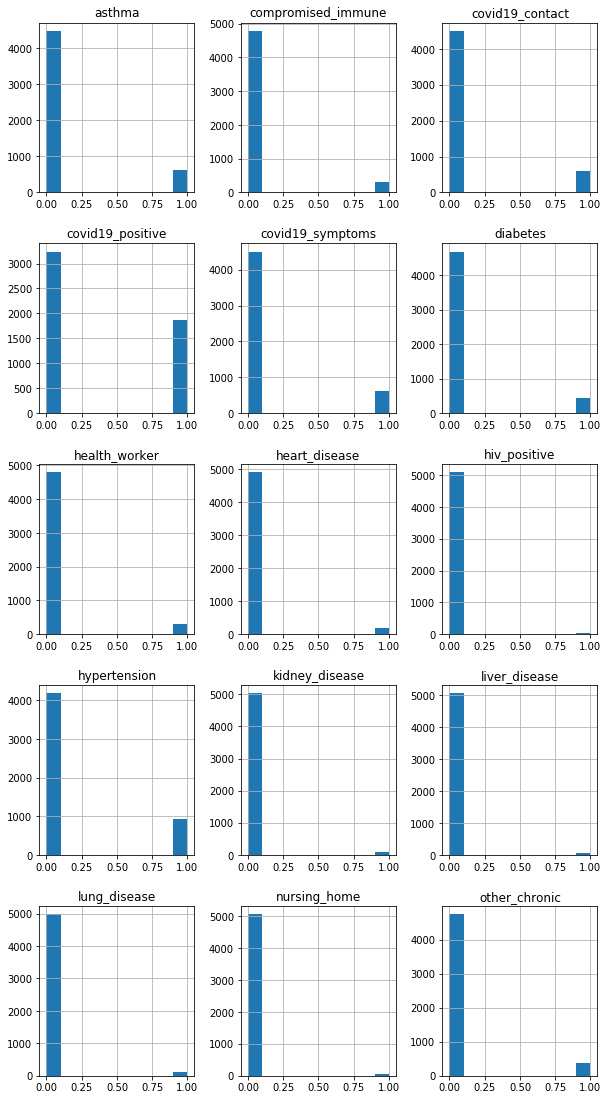

In [60]:
binary_var.hist(figsize=[10,60], layout=[15,3])

Histograms of above variables show that, the majority of these factors have the values of 0, meaning they show the negative results for all survey questions. The column has the highest number of '1' is unfortunately Covid19_positive, this dictates that other medical conditions do not substantially impact the possibility of being infected by the pandemic. 

In [51]:
nominal_var=df.loc[:,['sex', 'age','blood_type','smoke','insurance','income','immigrant','race','working','worried']]

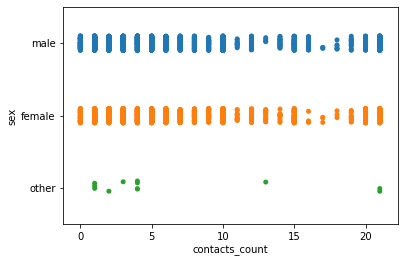

In [58]:
ax = sns.stripplot(x="contacts_count", y="sex", data=df)

### This one is a lot of work, I will come back to it tomorrow

###### 2. Correlation between 'covid19_positive' and 'risk_infection'

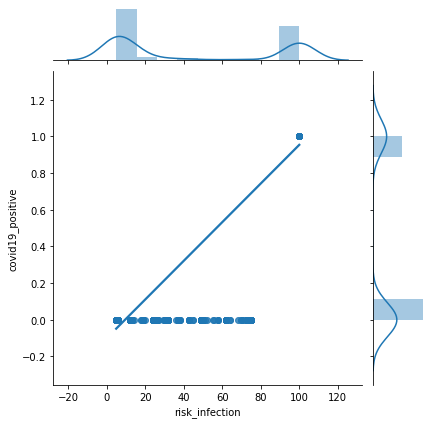

In [33]:
sns.jointplot(x='risk_infection',y='covid19_positive',data=df,kind='reg')

As we see from the joint plot above, the line represented for the relationship of 2 given variables is a straight line, therefore it is certainly a linear relationship. However this is a special case. As dictated from the chart, it shows an absolute correlation in which only produces 2 results: either negative with Covid19 or Positive with the virus. Also, it is an one-way relation: If a person is contracted with coronavirus, he/she is ensured to have 100% risk infection, if the rate is lower than that, he or she is believed to be negative with the pandemic test results, however, the vice versa cannot be true: unless the covid19 positive is one, the patient will always be negative to covid19 regardless of higher risk infection. Therefore, this is a linear dependent relationship.

In the data modelling process, the best algorithm to handle binary outcomes is logisitc regression, however, logistic models normally do not allow linear relationships. Therefore, in this case, we need to use mixed effect regression. This is a strong method  to model the probability of binary events (whether a person is definitely infected or not infected). 
There are multiple ways to deal with the kind of data, but the simplest approach will just be aggregated. To explain our team's strategy of handling these variables, the goal of this report must be restated: Is to decide if a person is contracted with virus or not and within same determining factors, we can predict the future input of respondents of their covid19 test based on the given survey. Therefore, we are allowed to completely remove the column of RISK INFECTION: Because no matter how high of a person's risk rate, he/she will still get negative result of covid19 if the rate is not 100%. So it is no point of measuring their infection possibility.

##### 3.3 Identify the highly correlated variable pairs

The heatmap below shows the correlation of variables:

In [35]:
ad2=df.select_dtypes(include=['number'])


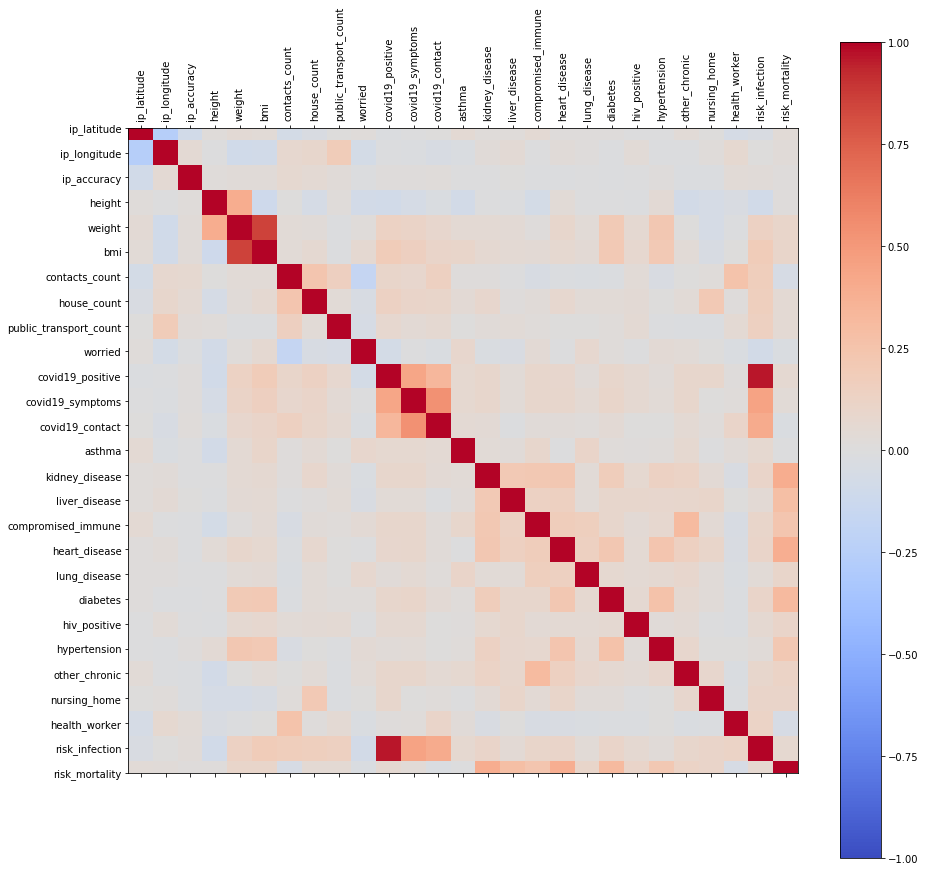

In [36]:
corr = ad2.corr()
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111) 
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(ad2.columns),1) 
ax.set_xticks(ticks) 
plt.xticks(rotation=90) 
ax.set_yticks(ticks) 
ax.set_xticklabels(ad2.columns) 
ax.set_yticklabels(ad2.columns) 
plt.show()

As we can see from the given matrix, there are only 2 pairs of variables can be considered as "Highly Correlated":
- risk_infection and covid_positive
- bmi and weight

Our approach to the first pair variables has been discussed above, we only need to view the bmi-weight relationship. Identifying highly correlated pairs is extremely important basic process in exploratory data mining tasks. The strong dependence between factors can speed up the search process. In the general aim of our report, we can use logistic regression or market basket to determine our derived variable (which is "Obesity" - will be discussed later in this report). The further handling approach will also be detailed in TASK 5. 

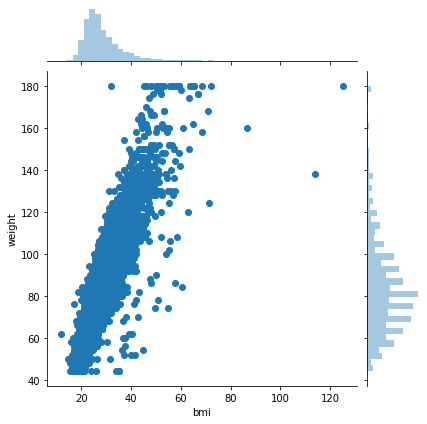

In [37]:
sns.jointplot(x='bmi',y='weight',data=df,kind='scatter')